In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
data = pd.read_csv('./insurance.csv')

In [4]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
data.shape

(1338, 7)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
data.select_dtypes('object').describe()

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [9]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
data.duplicated().sum()

1

In [11]:
data[data.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [12]:
data.drop_duplicates(inplace=True)

In [13]:
data.shape

(1337, 7)

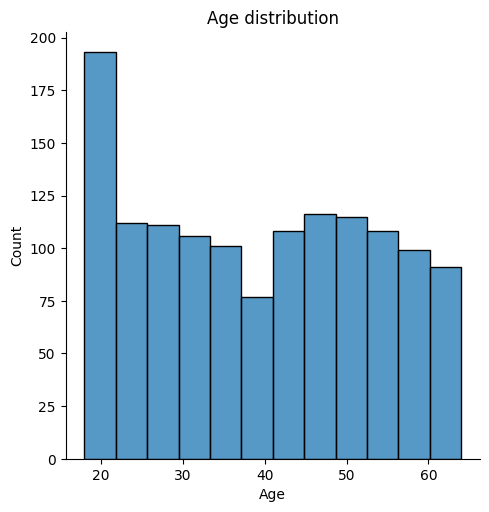

In [14]:
sns.displot(data=data,x='age')
plt.xlabel('Age')
plt.title('Age distribution');

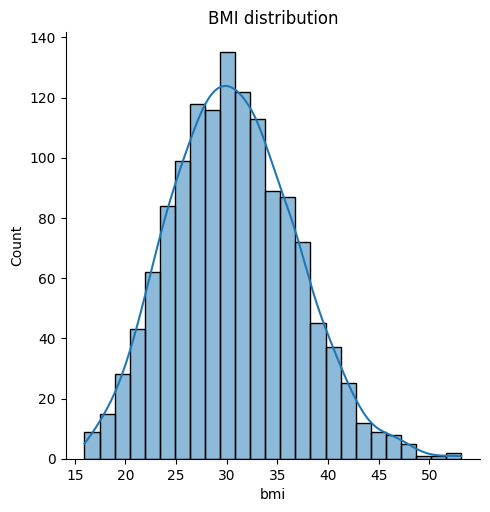

In [15]:
sns.displot(data=data,x='bmi',kde=True)
plt.title('BMI distribution');

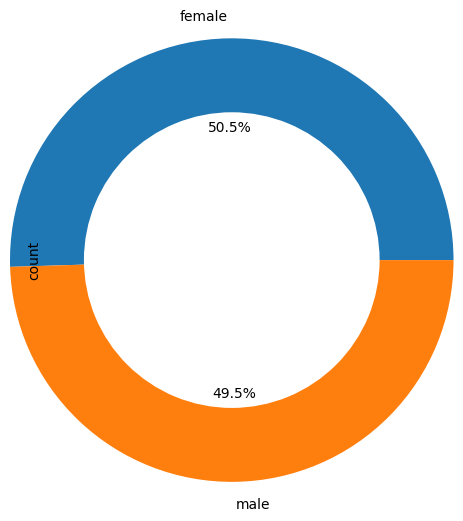

In [16]:
data['sex'].value_counts().plot(kind='pie',labels=data['sex'].unique(),autopct='%1.1f%%',radius=1.5)
plt.pie([1],colors='white',radius=1);

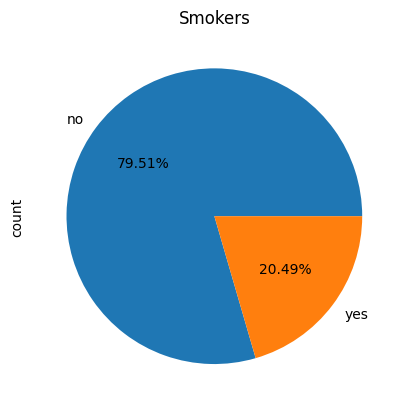

In [17]:
data['smoker'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title('Smokers');

In [18]:
x = data.loc[:,['sex','smoker']].groupby('sex').value_counts()

In [19]:
x = pd.DataFrame(x)
x

count
sex    smoker       
female no        547
       yes       115
male   no        516
       yes       159

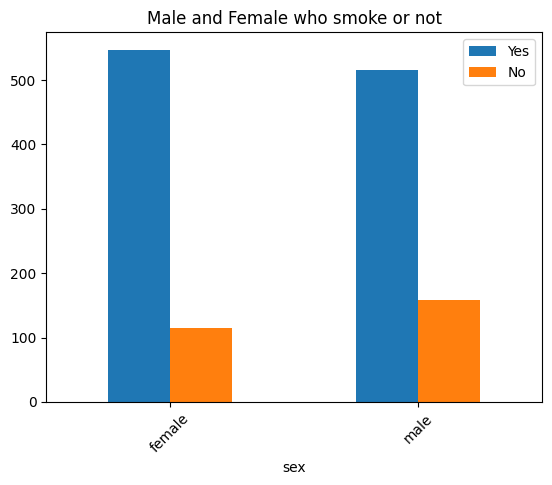

In [20]:
x.unstack().plot(kind='bar',stacked=False)
plt.title('Male and Female who smoke or not')
plt.legend(['Yes','No'])
plt.xticks(rotation=45);

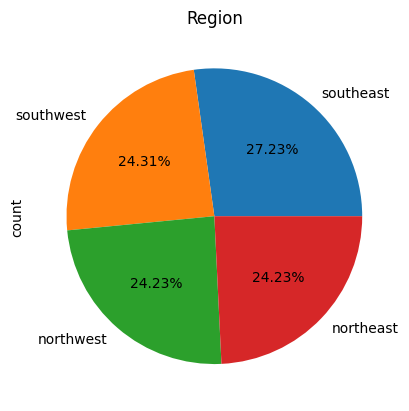

In [21]:
data.region.value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title('Region');

In [22]:
data.head(1)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.924


In [23]:
gender_region = pd.DataFrame(data.loc[:,['sex','region']].groupby('region').value_counts())
gender_region

count
region    sex          
northeast male      163
          female    161
northwest female    164
          male      160
southeast male      189
          female    175
southwest male      163
          female    162

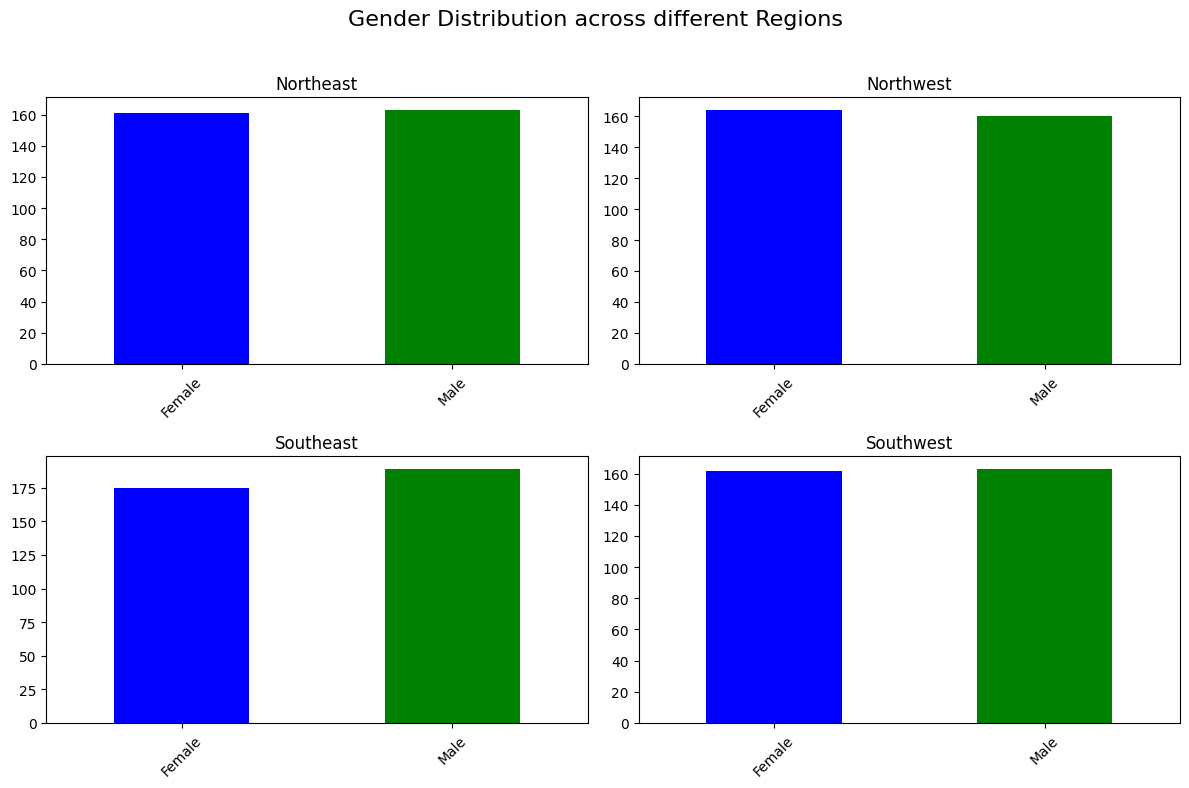

In [24]:

regions = ['northeast','northwest','southeast','southwest']
fig,axes = plt.subplots(2,2,figsize=(12,8))

axes = axes.flatten()

for i,j in enumerate(regions):
    gender_region.unstack().loc[j].plot(kind='bar', stacked=False, color=['blue', 'green'], ax=axes[i])
    
    axes[i].set_xticks([0,1])
    axes[i].set_xticklabels(['Female','Male'])
    
    axes[i].set_title(j.title())
    
    axes[i].set_xlabel('')
    
    axes[i].tick_params(axis='x',rotation=45)
    
fig.suptitle('Gender Distribution across different Regions',fontsize=16)
plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

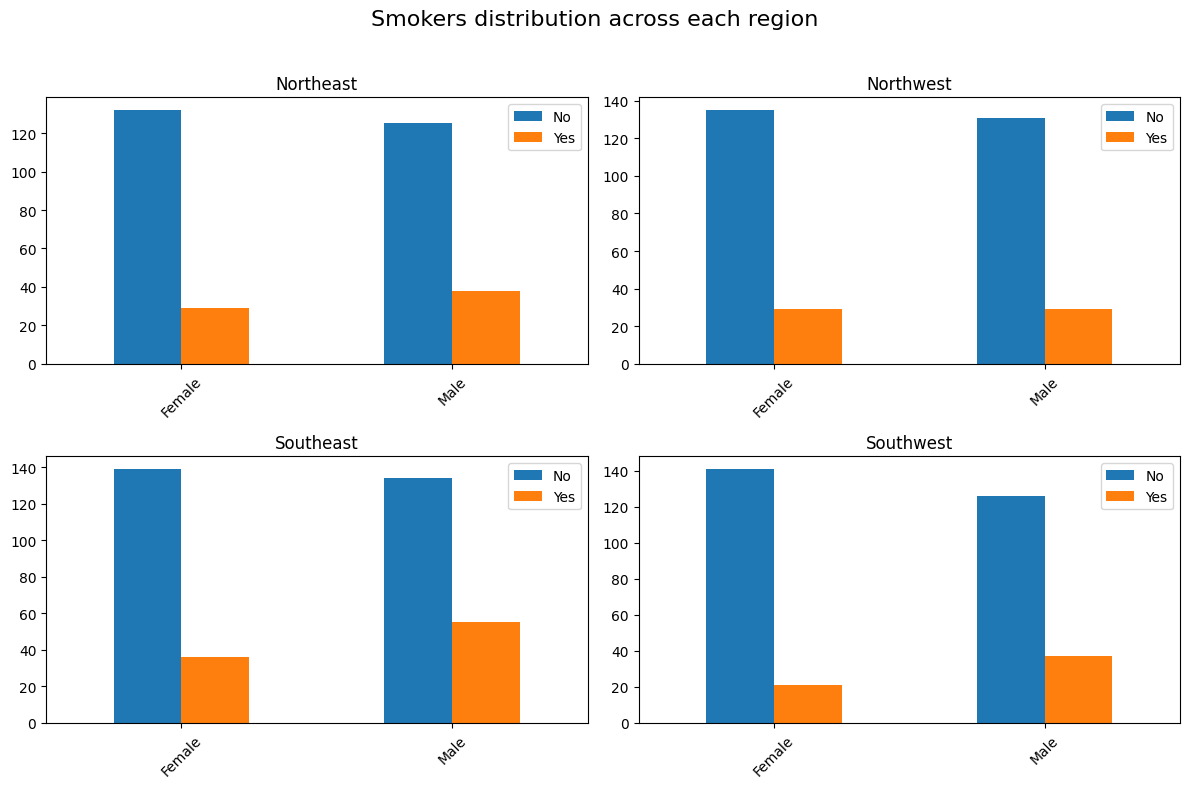

In [25]:
fig,axes = plt.subplots(2,2,figsize=(12,8))

axes = axes.flatten()

for i,j in enumerate(regions):
    pd.DataFrame(data.loc[:,['sex','region','smoker']].groupby(['region','sex']).value_counts()).unstack().loc[j].plot(kind='bar',stacked=False,ax=axes[i])
    
    axes[i].set_xticks([0,1])
    axes[i].set_xticklabels(['Female','Male'])
    
    axes[i].set_title(j.title())
    axes[i].tick_params(axis='x',rotation=45)
    
    axes[i].set_xlabel('')
    
    axes[i].legend(['No','Yes'])
    
fig.suptitle('Smokers distribution across each region',fontsize=16)
plt.tight_layout(rect = [0,0,1,0.96])
plt.show()

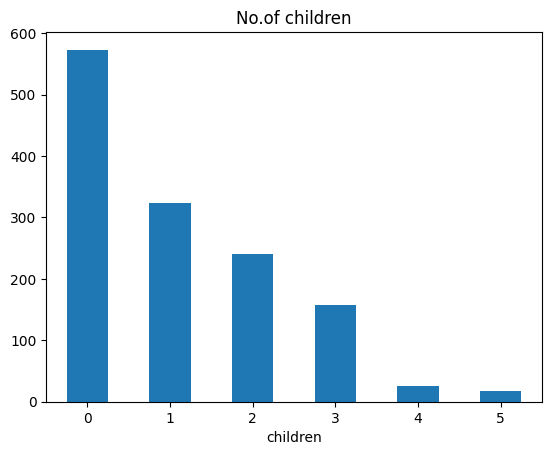

In [26]:
data['children'].value_counts().plot(kind='bar')
plt.title('No.of children')
plt.xticks(rotation=0);

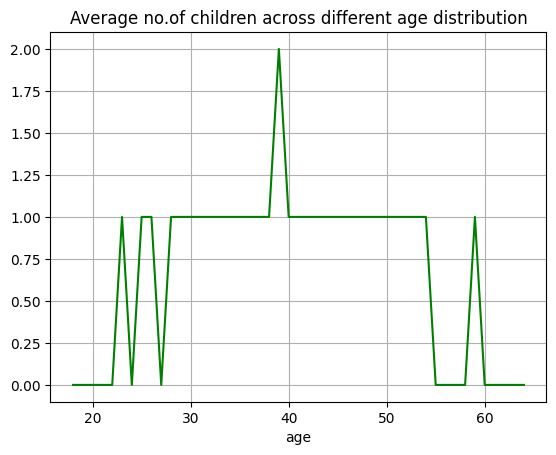

In [27]:
avg_children_by_age = data.groupby('age')['children'].mean()

avg_children_by_age.astype('int').plot(grid=True,color='green')
plt.title('Average no.of children across different age distribution');

In [28]:
gender_encoder = LabelEncoder()
smoker_encoder = LabelEncoder()
region_encoder = LabelEncoder()

data['sex'] = gender_encoder.fit_transform(data['sex'])
data['smoker'] = smoker_encoder.fit_transform(data['smoker'])
data['region'] = region_encoder.fit_transform(data['region'])

data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [29]:
X = data.drop('charges',axis=1)
y = data.charges

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=24,shuffle=True)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
X_train

array([[ 0.97669473, -1.00093589,  0.88136727,  0.74969562, -0.49443939,
         1.36565992],
       [-1.51600877, -1.00093589, -0.54371581,  1.58277734,  2.02249257,
         0.4543675 ],
       [ 1.54645553,  0.99906498,  0.87475436, -0.91646783,  2.02249257,
         0.4543675 ],
       ...,
       [-1.01746807,  0.99906498, -0.79831303, -0.91646783, -0.49443939,
         0.4543675 ],
       [ 0.69181433,  0.99906498, -1.33147926, -0.91646783, -0.49443939,
        -1.36821734],
       [ 1.76011583,  0.99906498,  1.42031981, -0.0833861 , -0.49443939,
         0.4543675 ]])

In [31]:
y_train

132     11163.56800
1204    18223.45120
421     46599.10840
613      6753.03800
1106     8988.15875
           ...     
145      5138.25670
343     13981.85035
192      2137.65360
900      8688.85885
418     14418.28040
Name: charges, Length: 1069, dtype: float64

In [32]:
model = Sequential([
    Dense(64,activation='relu',input_shape=(X_train.shape[1],)),
    Dense(32,activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam',loss='mean_absolute_error',metrics=['mae'])

model.summary()

C:\Users\datta\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,561 (10.00 KB)

 Trainable params: 2,561 (10.00 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
early_stopping = EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)

In [34]:
regressor = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,callbacks=[early_stopping])

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 13102.3682 - mae: 13102.3682 - val_loss: 14166.9424 - val_mae: 14166.9424
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13199.0703 - mae: 13199.0703 - val_loss: 14162.4629 - val_mae: 14162.4629
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 13027.7344 - mae: 13027.7344 - val_loss: 14153.2109 - val_mae: 14153.2109
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12321.3076 - mae: 12321.3076 - val_loss: 14136.2207 - val_mae: 14136.2207
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13250.0195 - mae: 13250.0195 - val_loss: 14107.7334 - val_mae: 14107.7334
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13059.8340 - mae: 13059.8340 - val_loss: 14064.1328 - val_mae: 14064.1328
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12987.5098 - mae: 12987.5098 - val_loss: 14001.7617 - val_mae: 14001.7617
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13700.185

In [35]:
test_loss, test_mae = model.evaluate(X_test,y_test)

print(f'Test Loss: {test_loss}')
print(f'Test MAE: {test_mae}')

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3354.5522 - mae: 3354.5522 
Test Loss: 3449.71630859375
Test MAE: 3449.71630859375


In [36]:
from sklearn.metrics import r2_score

r2_score(y_true=y_test,y_pred=model.predict(X_test))

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


0.768827703283081